# Save Water

*NOTE: Focusing on just the lakes in the US for all the analysis below.*

## Goals
- Given the lake that was created in the middle on Manhattan can we identify other similar looking lakes?
- The big picture being, given a harmful feature, can we identify similar features on OpenStreetMap and are they harmful in nature?

## Data

Geojson of the harmful lake in the middle of Manhattan.
```json
{"type":"Feature","id":"way!481252780!2","properties":{"natural":"water","water":"lake","osm:type":"way","osm:id":481252780,"osm:version":2,"osm:changeset":47005897,"osm:timestamp":1490000491000,"osm:uid":3479270,"osm:user":"nammala"},"geometry":{"type":"MultiPolygon","coordinates":[[[[-74.006621,40.736432],[-74.0082566,40.7361974],[-74.008322,40.736188],[-74.0082979,40.7364619],[-74.008254,40.736961],[-74.006498,40.736957],[-74.006621,40.736432]]]]},"deleted":true}
```

## Features

### Analysis complete
- Area of the feature
- Number of nodes in the feature geometry
- Percentage of bbox covered by the feature
- Total number of user changesets \ features
- Does the feature have a name

### Analysis to do
- Type of the feature (node | way | relation)
- Has Wikipedia or Wikidata
- When was it created
- Number of primary tags
- What and the number of other tags
- Number of name translations

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import ensemble

In [3]:
def get_length_of_name(name):
    if pd.isnull(name):
        return 0
    return len(name)

In [4]:
features = pd.read_csv('../data/save-water/features.csv')

features['feature_bbox_percentage'] = features['feature_area'] / features['feature_bbox_area']
features['feature_bbox_percentage'] = features['feature_bbox_percentage'].fillna(0)

features['name_length'] = features['name'].apply(get_length_of_name)
features['name_length'] = features['name_length'].fillna('')

print(features.shape)
features.head()

(14544, 15)


,feature_id,feature_type,feature_version,feature_area,feature_coordinates,feature_bbox_area,name,changeset_id,changeset_timestamp,user_id,user_name,user_changesets,user_features,feature_bbox_percentage,name_length
0,2575055633,node,1,0.00,1,0.00,Lake Petenwell,19385721,1386715393,1743198,ItalianMustache,18094.0,1259373.0,0.000000,14
1,3319529761,node,1,0.00,1,0.00,Rennis Lake,28492277,1422559325,690275,Firefishe,143.0,2836.0,0.000000,11
2,3346227220,node,1,0.00,1,0.00,Hillebrand Lake,28801260,1423763995,542403,SD Mapman,7793.0,516948.0,0.000000,15
3,4057927,relation,1,219099.65,114,603418.42,Crooked Lake,25591215,1411339609,437598,dmgroom_ct,13266.0,2847271.0,0.363097,12
4,6758398,relation,1,218918.49,75,529688.81,Twin Lakes,44129852,1480743220,1751737,Skybunny,17162.0,687813.0,0.413296,10


In [6]:
numericals = ['feature_version', 'feature_area', 'feature_coordinates', 'feature_bbox_area', 'feature_bbox_percentage', 'user_changesets', 'user_features']
numerical_features = features[numericals]
numerical_features = numerical_features.dropna()
print(numerical_features.shape)
numerical_features.head()

(14528, 7)


,feature_version,feature_area,feature_coordinates,feature_bbox_area,feature_bbox_percentage,user_changesets,user_features
0,1,0.00,1,0.00,0.000000,18094.0,1259373.0
1,1,0.00,1,0.00,0.000000,143.0,2836.0
2,1,0.00,1,0.00,0.000000,7793.0,516948.0
3,1,219099.65,114,603418.42,0.363097,13266.0,2847271.0
4,1,218918.49,75,529688.81,0.413296,17162.0,687813.0


# Feature 1 - Area of the feature

In [7]:
feature_area_harmful = 10425.51  # Area is in square meters.
print('Features with area less than or equal to harmful lake: {}'.format(features[features['feature_area'] <= feature_area_harmful].shape[0]))
print('Features with area greater than the harmful lake: {}'.format(features[features['feature_area'] > feature_area_harmful].shape[0]))
features['feature_area'].describe()

Features with area less than or equal to harmful lake: 6581
Features with area greater than the harmful lake: 7963


count    1.454400e+04
mean     1.173518e+05
std      2.726172e+06
min      0.000000e+00
25%      4.065005e+03
50%      1.278747e+04
75%      4.322822e+04
max      3.086395e+08
Name: feature_area, dtype: float64

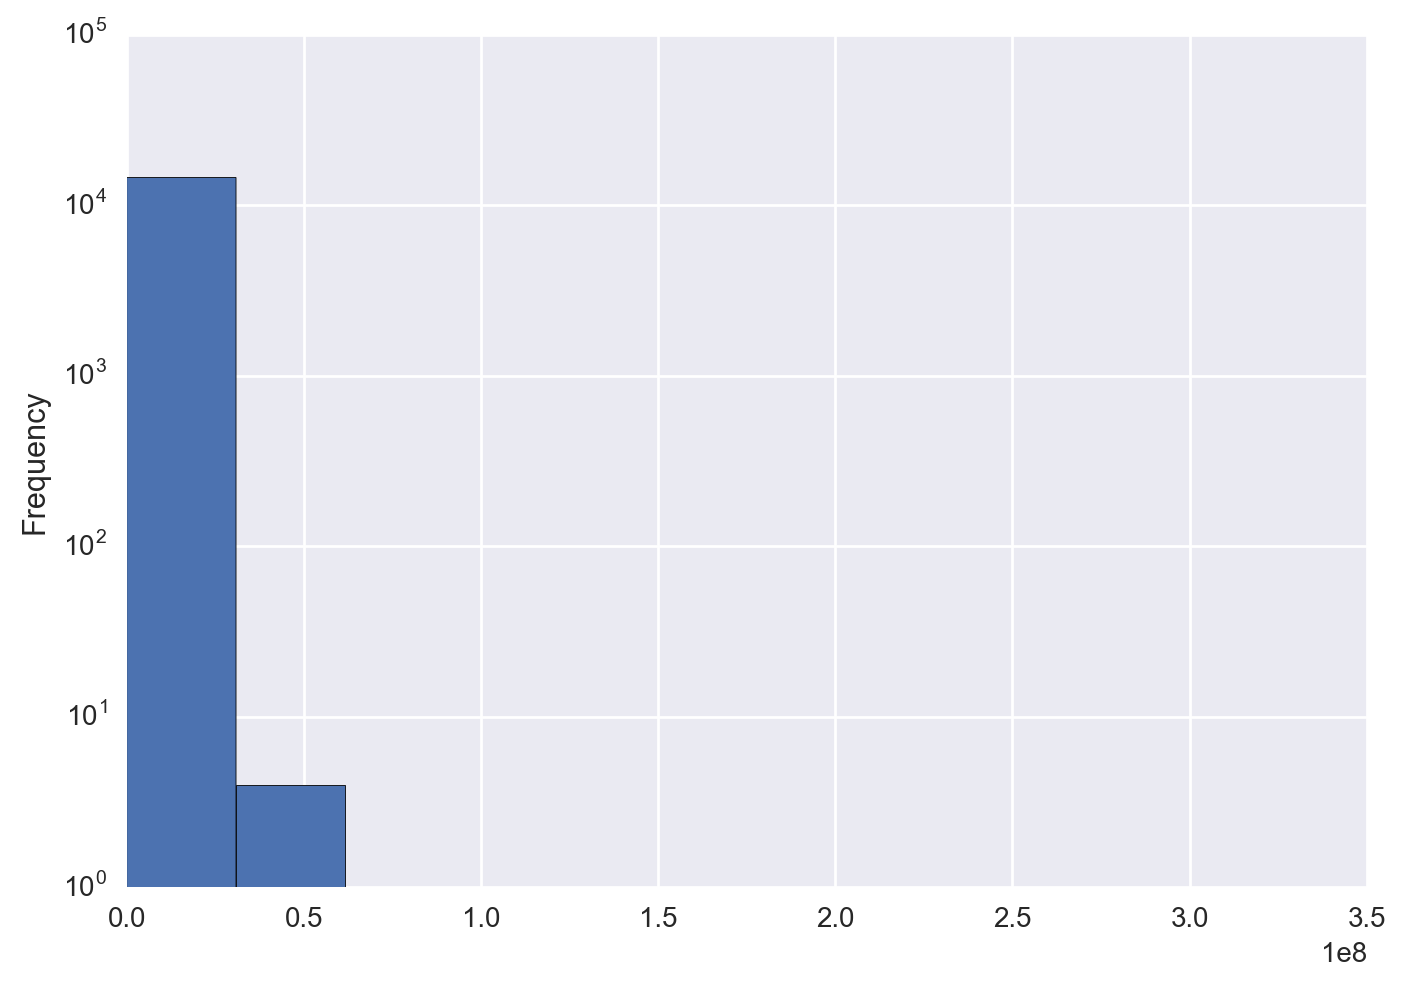

In [8]:
ax = features['feature_area'].plot.hist()
ax.set_yscale('log')

## Lakes with an area of zero

In [10]:
temp = features[(features['feature_type'] == 'way') & (features['feature_area'] == 0)]
print('Number of features: {}'.format(temp.shape[0]))
temp.head(10)

Number of features: 2


,feature_id,feature_type,feature_version,feature_area,feature_coordinates,feature_bbox_area,name,changeset_id,changeset_timestamp,user_id,user_name,user_changesets,user_features,feature_bbox_percentage,name_length
2512,379854480,way,1,0.0,113,61835.21,NaN,35253097,1447295513,139555,DavidJDBA,25832.0,4168328.0,0.0,0
14332,460964455,way,1,0.0,5,0.00,NaN,44569751,1482340168,5001228,coffeena,6.0,111.0,0.0,0


- Feature: http://www.openstreetmap.org/way/414865128
- Area of the lake is `0` as the way is un-closed.

<img width="1227" alt="screen shot 2017-03-22 at 8 08 41 am" src="https://cloud.githubusercontent.com/assets/2899501/24179721/d34f646e-0ed6-11e7-84d3-c1aee71e6975.png">

- Feature: http://www.openstreetmap.org/way/341953722
- Although visually looking great, the area is `0` as the geometry type is a `LineString` and not a `Polygon`

<img width="1227" alt="screen shot 2017-03-22 at 8 15 34 am" src="https://cloud.githubusercontent.com/assets/2899501/24179888/effd55c0-0ed7-11e7-933b-ec177fde97b5.png">

# Feature 2 - Number of coordinanates in the feature

In [11]:
feature_coordinates_harmful = 7
print('Features with coordinates less than or equal to harmful lake: {}'.format(features[features['feature_coordinates'] <= feature_coordinates_harmful].shape[0]))
print('Features with coordinates greater than harmful lake: {}'.format(features[features['feature_coordinates'] > feature_coordinates_harmful].shape[0]))
features['feature_coordinates'].describe()

Features with coordinates less than or equal to harmful lake: 628
Features with coordinates greater than harmful lake: 13916


count    14544.000000
mean        43.079827
std        107.268341
min          1.000000
25%         15.000000
50%         25.000000
75%         44.000000
max       6497.000000
Name: feature_coordinates, dtype: float64

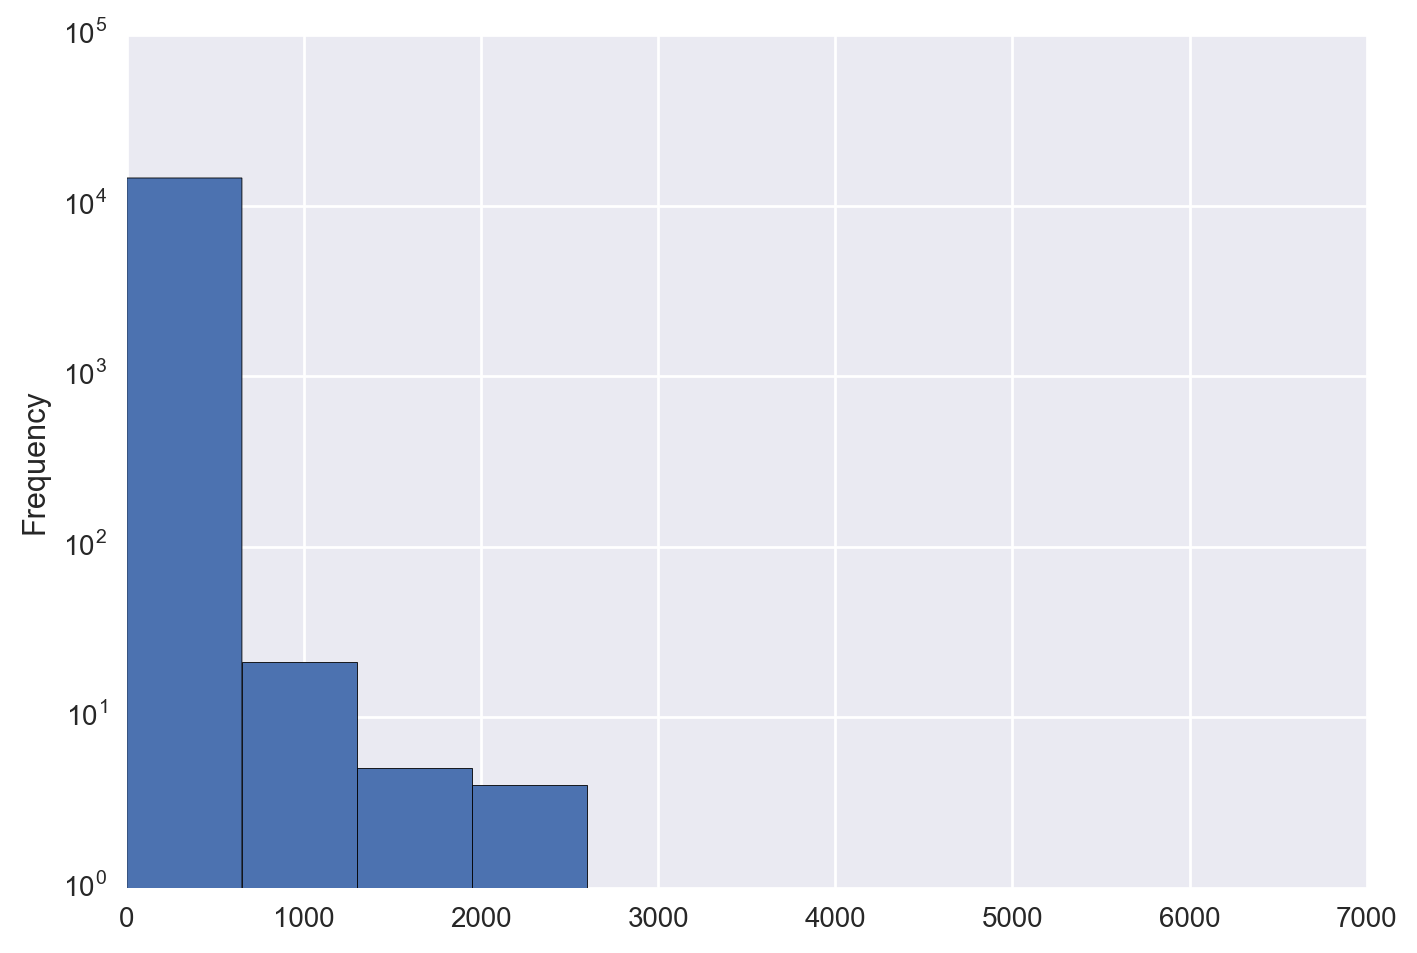

In [12]:
ax = features['feature_coordinates'].plot.hist()
ax.set_yscale('log')

## How do features with few coordinates look like?

In [14]:
# A polygon should have atleast 3 coordinates.
temp = features[(features['feature_type'] != 'node') & (features['feature_coordinates'] < 5)]
print('Number of features: {}'.format(temp.shape[0]))
temp.head(10)

Number of features: 19


,feature_id,feature_type,feature_version,feature_area,feature_coordinates,feature_bbox_area,name,changeset_id,changeset_timestamp,user_id,user_name,user_changesets,user_features,feature_bbox_percentage,name_length
1249,292023847,way,1,161724.48,4,539011.74,Cranberry Lake,24038087,1404880247,2174491,dbhunter,19.0,79.0,0.300039,14
3687,469264721,way,1,2454.64,4,5628.02,NaN,45537023,1485479067,5083495,Choopy,3.0,59.0,0.436146,0
3688,469264722,way,1,821.07,4,1693.60,NaN,45537023,1485479067,5083495,Choopy,3.0,59.0,0.484808,0
4135,309847488,way,1,26077.64,4,90971.73,Eagle Lake,26353920,1414371444,2414549,mdd5181,25.0,73.0,0.286657,10
4439,470063404,way,1,325.54,4,1201.30,Lake Matt,45634461,1485729820,5223001,MattForce,5.0,86.0,0.270990,9
8035,361995836,way,1,2341.22,4,5510.94,NaN,32840651,1437707746,2077000,Kirbert,15028.0,1073351.0,0.424831,0
8303,379093790,way,1,2732.35,4,5464.70,NaN,35171258,1446995634,2077000,Kirbert,15028.0,1073351.0,0.500000,0
9260,448563942,way,1,16087.54,4,32268.36,Hidden Lake,43019491,1476910172,4749832,David Dornier,8.0,148.0,0.498555,11
9375,462215777,way,1,3714.05,4,7498.86,NaN,44718506,1482882680,2077000,Kirbert,15028.0,1073351.0,0.495282,0
9835,479926721,way,1,3.31,4,7.05,wood lake,46769714,1489259609,5464266,Rustywood,14.0,103.0,0.469504,9


## How do features with lots of coordinates look like?

In [20]:
features[features['feature_coordinates'] > 600].sort_values(by='feature_coordinates', ascending=False).head(10)

,feature_id,feature_type,feature_version,feature_area,feature_coordinates,feature_bbox_area,name,changeset_id,changeset_timestamp,user_id,user_name,user_changesets,user_features,feature_bbox_percentage,name_length
4310,6376044,relation,1,60103155.73,6497,6.959718e+08,NaN,40435143,1467446765,130472,fx99,21976.0,2623380.0,0.086359,0
11058,4046494,relation,1,41840675.85,5655,1.514001e+08,NaN,25490887,1410912245,437598,dmgroom_ct,13266.0,2847271.0,0.276358,0
6954,3207630,relation,1,3619257.45,3287,1.688499e+07,NaN,17842802,1379211912,369983,grouper,3893.0,2137635.0,0.214348,0
4311,6376123,relation,1,32521009.66,2464,1.937627e+08,Grand Lake,40435218,1467447054,130472,fx99,21976.0,2623380.0,0.167839,10
6953,3207623,relation,1,2878711.67,2263,1.466996e+07,NaN,17842802,1379211908,369983,grouper,3893.0,2137635.0,0.196232,0
6936,3207570,relation,1,3819808.87,2208,1.534790e+07,NaN,17842402,1379205838,369983,grouper,3893.0,2137635.0,0.248882,0
46,4064161,relation,1,4947298.95,1977,4.273949e+07,Beaver Dam Lake,25655365,1411599368,1751737,Skybunny,17162.0,687813.0,0.115755,15
2656,5839818,relation,1,2114365.81,1887,1.634256e+07,Deer Lake,36456326,1452298302,1743198,ItalianMustache,18094.0,1259373.0,0.129378,9
7486,3814619,relation,1,13365780.26,1724,8.209856e+07,Big Creek Lake,22879799,1402522705,22925,ELadner,7126.0,6733259.0,0.162802,14
7863,4849586,relation,1,4856954.60,1418,1.129146e+07,NaN,30646202,1430370479,574654,Tom_Holland,6851.0,1551941.0,0.430144,0


- Lakes tend to have higher number of coordinates, the mean being `33`.
- Larger lakes tend to be mapped as relations as the largest v1 lake, [way/410107988](http://www.openstreetmap.org/way/410107988) has 697 coordinates.

# Feature 3 - Percentage of bbox actually covered by feature

- A square feature covers the entire bbox and thus will have a percentage of 100%.
- The more square like or rectangular the feature, the higher the percentage.
- NOTE: Square features that are not orthogonal won't have 100% as the feature bbox's are always orthogonal.

In [21]:
feature_bbox_percentage_harmful = 0.78
print('Features with percenrage lesser than or equal to harmful lake: {}'.format(features[features['feature_bbox_percentage'] <= feature_bbox_percentage_harmful].shape[0]))
print('Features with percenrage greater than harmful lake: {}'.format(features[features['feature_bbox_percentage'] > feature_bbox_percentage_harmful].shape[0]))
features['feature_bbox_percentage'].describe()

Features with percenrage lesser than or equal to harmful lake: 13974
Features with percenrage greater than harmful lake: 570


count    14544.000000
mean         0.532616
std          0.165220
min          0.000000
25%          0.421970
50%          0.550149
75%          0.658538
max          0.996223
Name: feature_bbox_percentage, dtype: float64

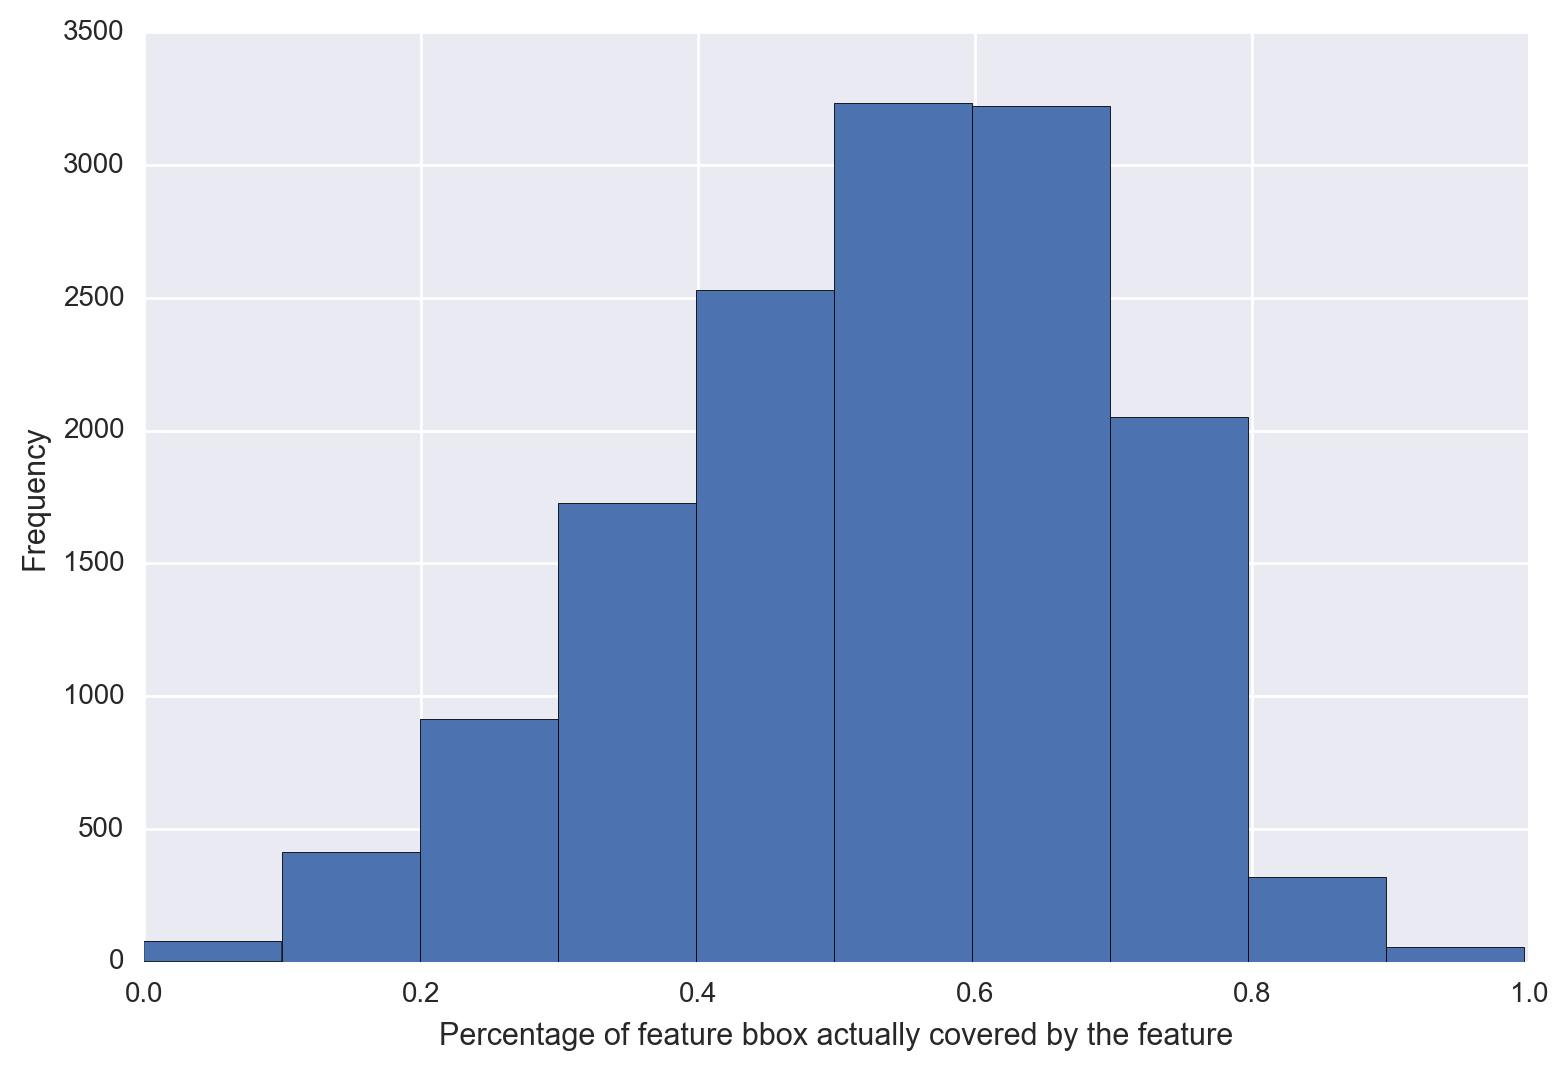

In [22]:
ax = features['feature_bbox_percentage'].plot.hist()
ax.set_xlabel('Percentage of feature bbox actually covered by the feature')
plt.tight_layout()

### Percentage of the feature bbox actually covered by feature is 100%

In [26]:
# The percentages are between 0 and 1.
features[features['feature_bbox_percentage'] > 0.9].sort_index(by='feature_bbox_percentage', ascending=False).head(10)

,feature_id,feature_type,feature_version,feature_area,feature_coordinates,feature_bbox_area,name,changeset_id,changeset_timestamp,user_id,user_name,user_changesets,user_features,feature_bbox_percentage,name_length
3981,481895290,way,1,60.67,5,60.90,NaN,47055069,1490142878,5460476,V1R4G3,1.0,30.0,0.996223,0
14410,469567073,way,1,1270.19,5,1277.61,NaN,45576714,1485555751,5210247,Julianislit,14.0,81.0,0.994192,0
7706,312937539,way,1,2895.50,5,2916.61,NaN,26801093,1416066434,2397497,williehlh,38.0,180.0,0.992762,0
14362,468637460,way,1,7991.38,6,8084.14,NaN,45462944,1485323547,5187119,octagone,2.0,15.0,0.988526,0
14408,469560333,way,1,401.82,5,409.28,NaN,45575806,1485553516,5210247,Julianislit,14.0,81.0,0.981773,0
7295,278044607,way,1,9120.03,9,9299.67,NaN,22026815,1398790671,2014354,WIJG,25.0,3600.0,0.980683,0
14382,469257767,way,1,20483.28,5,21068.30,NaN,45536604,1485478146,5202922,mappernate,7.0,105.0,0.972232,0
3671,468618328,way,1,194.21,5,200.87,NaN,45461650,1485320278,5184361,MZece,23.0,359.0,0.966844,0
7553,305726151,way,1,5690.37,13,5897.16,NaN,25769883,1412089272,238898,BlueG,1057.0,154046.0,0.964934,0
9528,468793524,way,1,3070.24,5,3184.21,Thousand Oak Lake,45484685,1485367421,5191193,Naui349,8.0,47.0,0.964208,17


- Feature: http://www.openstreetmap.org/way/442498678/
- The feature is a rectangular lake created by a new user which he/she later deleted.
- TODO: Some false positives show up in the list as percentage=100%

<img width="1227" alt="screen shot 2017-03-22 at 10 33 36 am" src="https://cloud.githubusercontent.com/assets/2899501/24182988/464e45f2-0eeb-11e7-809a-6d8c006cc137.png">

# Feature 4: Number of changesets of the user

In [27]:
user_changesets_harmful = 3
print('Features with user changesets lesser than or equal to harmful lake: {}'.format(features[features['user_changesets'] <= user_changesets_harmful].shape[0]))
print('Features with user changesets greater than harmful lake: {}'.format(features[features['user_changesets'] > user_changesets_harmful].shape[0]))
features['user_changesets'].describe()

Features with user changesets lesser than or equal to harmful lake: 131
Features with user changesets greater than harmful lake: 14397


count     14528.000000
mean       6835.408866
std        8342.932697
min           0.000000
25%        1022.000000
50%        3893.000000
75%       10235.000000
max      103333.000000
Name: user_changesets, dtype: float64

- New users don't tend to create lakes.
- Just `125` out of `16749` lakes were created by users with changesets 3 or less.

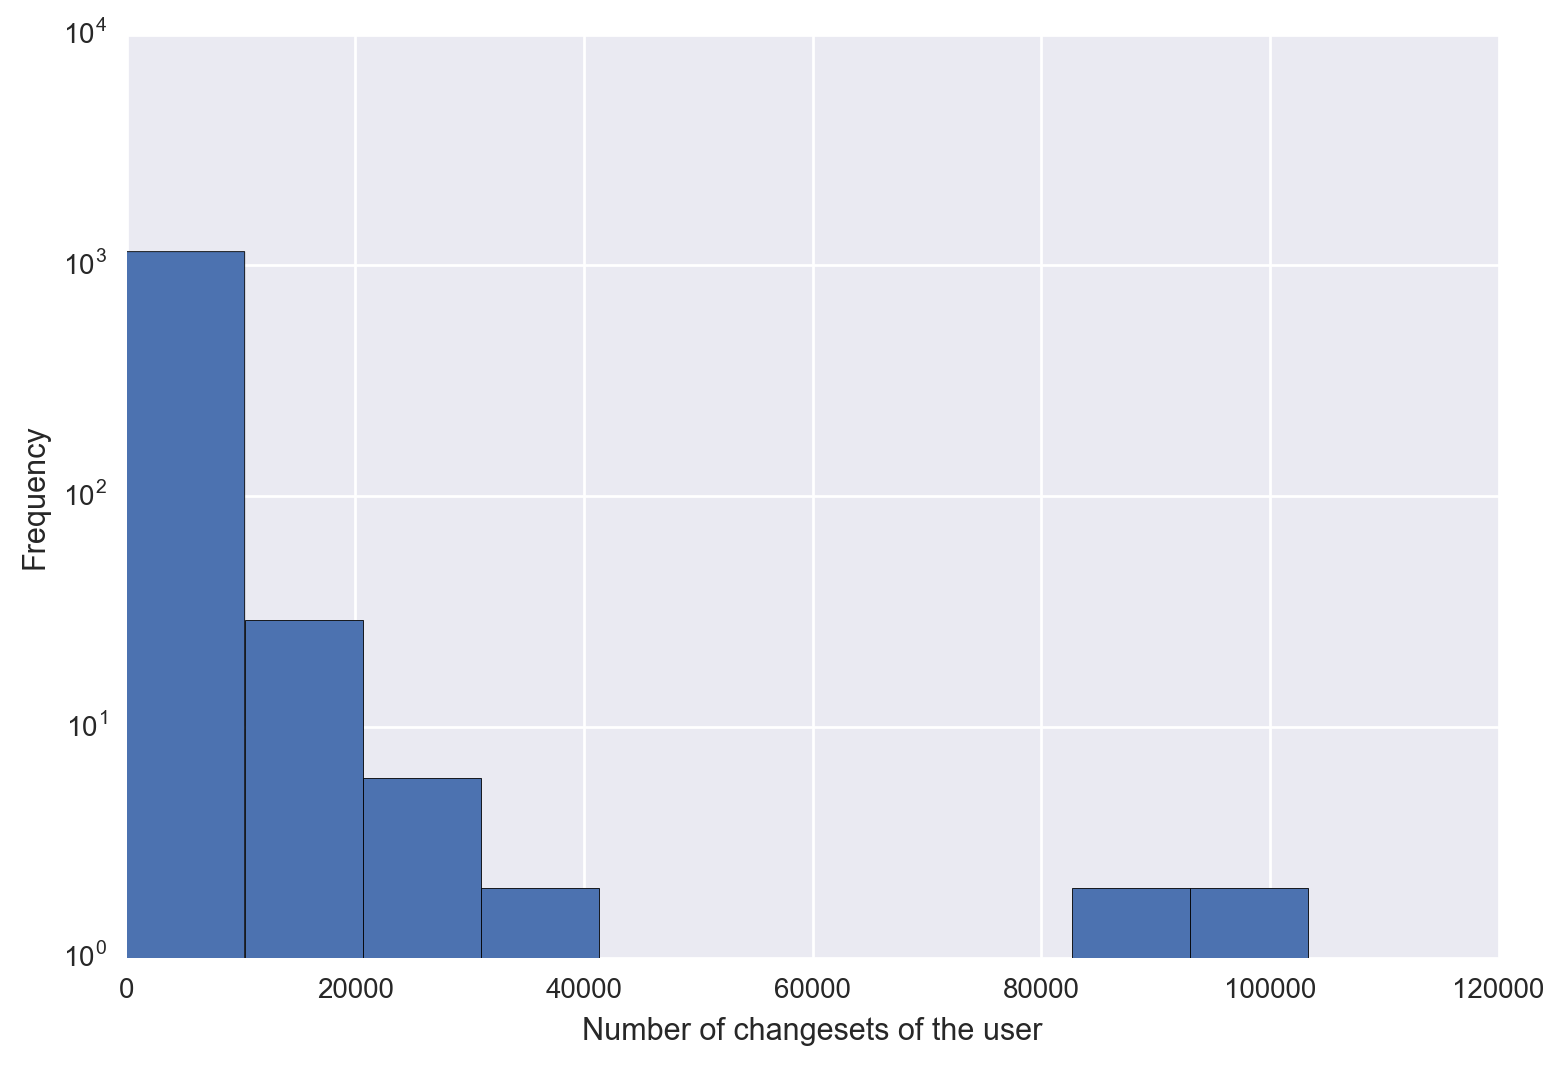

In [28]:
ax = features.drop_duplicates('user_name')['user_changesets'].plot.hist()
ax.set_yscale('log')
ax.set_xlabel('Number of changesets of the user')
plt.tight_layout()

## Lakes created by users with 0 changesets. What? Really?
- Issue with osm-comments-api, ticketed out here: https://github.com/mapbox/osm-comments-api/issues/65#issuecomment-288306225

In [29]:
features[features['user_changesets'] == 0]

,feature_id,feature_type,feature_version,feature_area,feature_coordinates,feature_bbox_area,name,changeset_id,changeset_timestamp,user_id,user_name,user_changesets,user_features,feature_bbox_percentage,name_length
4473,473632121,way,1,3307.86,17,4821.69,Lake,45954993,1486667152,5290698,DoctorTeeth,0.0,0.0,0.686037,4


- User [DoctorTeeth](http://www.openstreetmap.org/user/DoctorTeeth) is new to OpenStreetMap.
- Feature: http://www.openstreetmap.org/way/473631956
- Some documentation about mapping best practices would be amazing to share with the user.
- Ex: Building has the name `House` and lake has the name `Lake` and sometimes `Water Table`.

<img width="1227" alt="screen shot 2017-03-22 at 11 53 17 am" src="https://cloud.githubusercontent.com/assets/2899501/24184881/2c670af6-0ef6-11e7-9e66-e16a65f2553e.png">

# Feature 5: Does the lake have a name?

In [30]:
name_harmful = None
print('Features with name: {}'.format(features['name'].dropna().shape[0]))
print('Features without name: {}'.format(features['name'].isnull().sum()))
print('Percentage of v1 lakes with name: {}%'.format(int(100.0 * features['name'].dropna().shape[0] / features['name'].isnull().sum())))

Features with name: 3922
Features without name: 10622
Percentage of v1 lakes with name: 36%


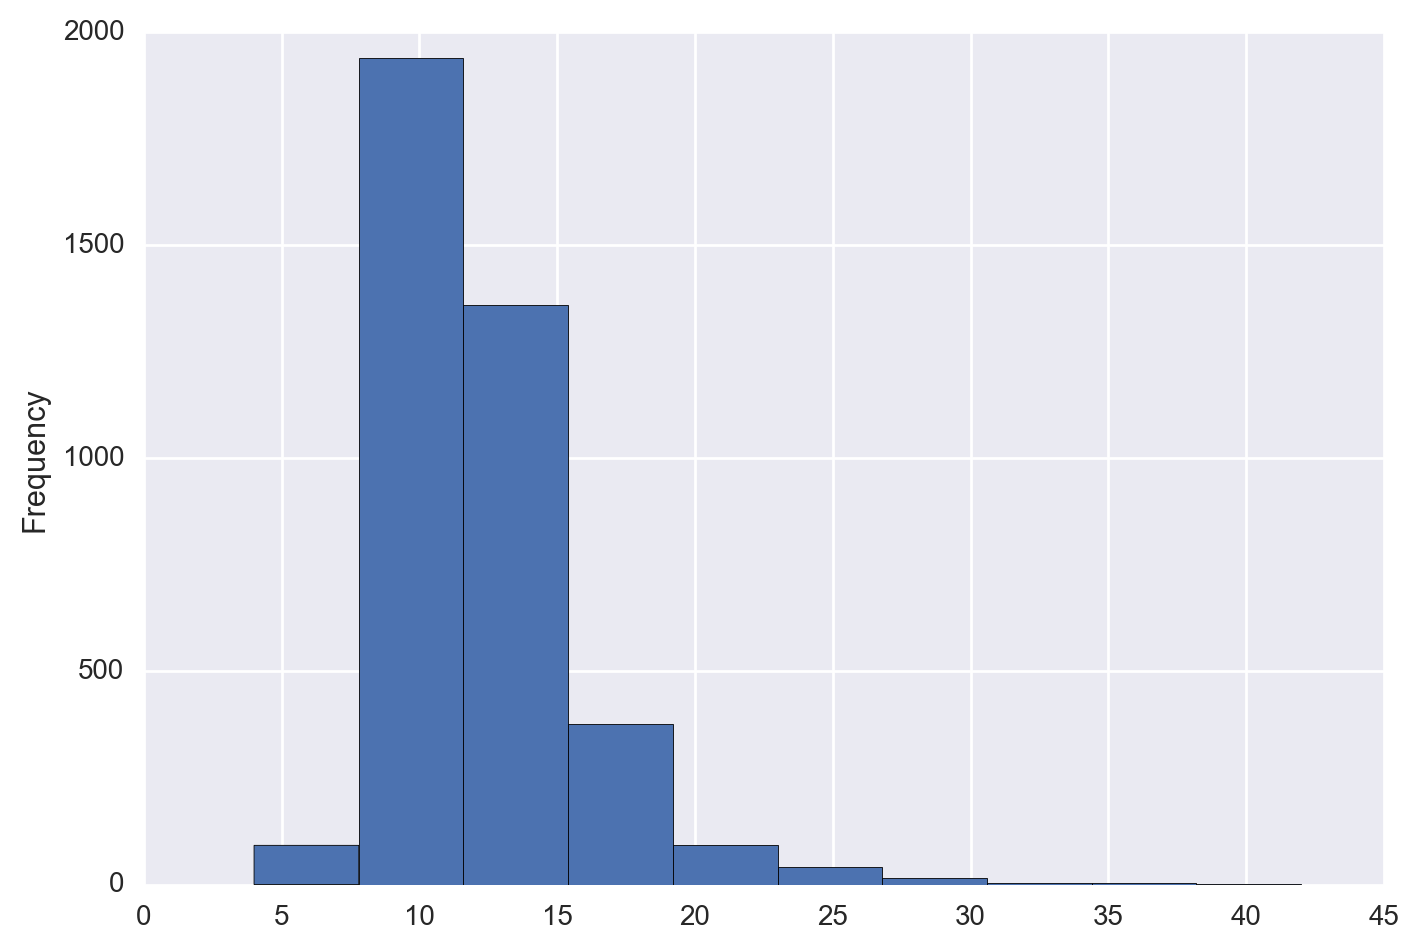

In [31]:
features[features['name_length'] > 0]['name_length'].plot.hist()

## What do small names look like?

In [36]:
features[(features['name_length'] > 0) & (features['name_length'] < 5)].sort_index(by='name_length').sample(10)

,feature_id,feature_type,feature_version,feature_area,feature_coordinates,feature_bbox_area,name,changeset_id,changeset_timestamp,user_id,user_name,user_changesets,user_features,feature_bbox_percentage,name_length
12490,361996659,way,1,13137.21,8,17648.35,9641,32840832,1437709429,2937740,BreckT,560.0,44690.0,0.744387,4
12625,362158588,way,1,67961.47,26,128593.78,9783,32861564,1437774900,2937740,BreckT,560.0,44690.0,0.528497,4
9855,480129915,way,1,3107.55,17,4475.41,Lake,46801270,1489378117,5460013,Dean Sam,9.0,533.0,0.694361,4
12546,361999981,way,1,39340.69,19,75200.59,9535,32841086,1437712400,2937740,BreckT,560.0,44690.0,0.523143,4
12532,361999959,way,1,22184.77,12,38685.51,9053,32841086,1437712398,2937740,BreckT,560.0,44690.0,0.573465,4
4506,479918450,way,1,89.47,5,118.18,Pool,46768561,1489256353,5468658,Samuraisb,14.0,151.0,0.757065,4
12603,362156571,way,1,27142.87,13,59216.22,9870,32861233,1437773829,2937740,BreckT,560.0,44690.0,0.458369,4
12626,362158590,way,1,40947.08,21,94330.96,9870,32861564,1437774900,2937740,BreckT,560.0,44690.0,0.434079,4
9811,479624882,way,1,32322.97,10,78815.26,Lake,46726515,1489110685,5459043,M-Flow,6.0,887.0,0.410111,4
12628,362158597,way,1,13818.94,12,32056.07,9626,32861564,1437774900,2937740,BreckT,560.0,44690.0,0.431087,4


- Feaure: http://www.openstreetmap.org/way/469253887
- A new user, [deered](http://www.openstreetmap.org/user/deered) with 2 changesets creates a lake with name "`nope`" with changeset comment "`please ignore`".
- The satellite imagery shows no water body in the region

<img width="1226" alt="screen shot 2017-03-22 at 12 13 21 pm" src="https://cloud.githubusercontent.com/assets/2899501/24185419/1989c3e4-0ef9-11e7-87fd-631c6ddbb562.png">

Another feature by the same user.
- Feature: http://www.openstreetmap.org/way/125564093
- The user added `natural=water`, `water=lake` and removed `tourism=hotel`, clearly some form of vandalism.
<img width="1224" alt="screen shot 2017-03-22 at 12 17 17 pm" src="https://cloud.githubusercontent.com/assets/2899501/24185535/99360846-0ef9-11e7-98ca-2b438fcebd6f.png">


## What do the large names look like?

In [38]:
features[features['name_length'] > 30].head(10)

,feature_id,feature_type,feature_version,feature_area,feature_coordinates,feature_bbox_area,name,changeset_id,changeset_timestamp,user_id,user_name,user_changesets,user_features,feature_bbox_percentage,name_length
216,229220656,way,1,61895.05,105,119450.22,Midlothian Creek Detention Reservoir,16879695,1373317748,518622,terremoto73,133.0,6507.0,0.518166,36
2684,394287292,way,1,88199.22,62,174971.51,Pottawatomie State Fishing Lake #1,36851214,1453965093,262151,ToeBee,2869.0,1862147.0,0.504078,34
4495,479537641,way,1,2080.24,27,4857.53,Forks Township Community Center Lake,46713366,1489075080,5180323,Thatsnotirony,9.0,669.0,0.428251,36
4524,482331824,way,1,73987.06,38,146434.99,Pocono Mountain Water Forest Lake,47110597,1490311930,5398684,Mike Lawlor,61.0,2855.0,0.505255,33
4602,226169237,way,1,44171.02,40,128468.94,Oconee State Park Lake Number Two,16597863,1371517724,1557531,stiri,47.0,2950.0,0.343826,33
7804,333354561,way,1,9314.00,72,25431.20,Smithfield Downs Golf Course Pond,29552214,1426630425,1505651,CynicalDooDad,4434.0,467993.0,0.366243,33
8406,391286307,way,1,185166.56,181,497604.30,Herrington Manor Recreation Area Reservoir,36560084,1452720730,247807,asciiphil,3573.0,2801326.0,0.372116,42
13210,385145884,way,1,1055.51,4,2176.57,Jerry Johnson Hotsprings main pools,35850906,1449683377,3437162,duluozbum,179.0,1466.0,0.484942,35


- Things looks good on the large names side. Yay!

In [23]:
assert False

AssertionError: 

# Exploratory data analysis

In [ ]:
sns.pairplot(numerical_features)

# Outlier Detection

In [ ]:
# Scaling features before training the classifier
scaler = preprocessing.StandardScaler().fit(numerical_features)
numerical_features = pd.DataFrame(scaler.transform(numerical_features), columns=numericals)
numerical_features.head()

In [ ]:
# Training the classifier
clf = ensemble.IsolationForest()
clf.fit(numerical_features)
clf

In [ ]:
def get_prediction(item):
    return clf.predict(scaler.transform([item[numericals]]))

features['prediction'] = features[numericals].dropna().apply(get_prediction, axis=1)['feature_area']

print('Total: {}'.format(features.shape[0]))
print('Number of outliers: {}'.format(features[features['prediction'] == -1].shape[0]))
print('Number of inliers: {}'.format(features[features['prediction'] == 1].shape[0]))

- NOTE: 10% of features are detected as outliers which is interesting.
- Basically, the algorithm thinks these features are different from the rest after looking at all the parameters.

In [ ]:
features[features['prediction'] == -1].drop_duplicates('feature_id').head()